In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data_collection/data.csv")

In [3]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,count
0,2003-12-01,0.83724,0.83056,0.83098,0.83577,0.0,0.83577,0.0
1,2003-12-02,0.83710,0.82583,0.83605,0.82720,0.0,0.82720,0.0
2,2003-12-03,0.82802,0.82440,0.82713,0.82488,0.0,0.82488,0.0
3,2003-12-04,0.83029,0.82345,0.82508,0.82775,0.0,0.82775,1.0
4,2003-12-05,0.82878,0.82028,0.82795,0.82055,0.0,0.82055,1.0


In [4]:
df.drop("Volume",1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4662 entries, 0 to 4661
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4662 non-null   object 
 1   High       4662 non-null   float64
 2   Low        4662 non-null   float64
 3   Open       4662 non-null   float64
 4   Close      4662 non-null   float64
 5   Adj Close  4662 non-null   float64
 6   count      4662 non-null   float64
dtypes: float64(6), object(1)
memory usage: 255.1+ KB


In [6]:
import matplotlib.pyplot as plt

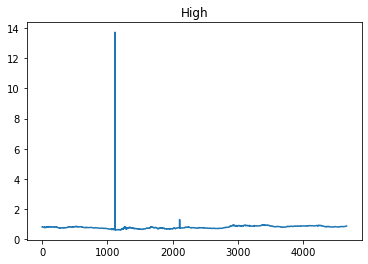

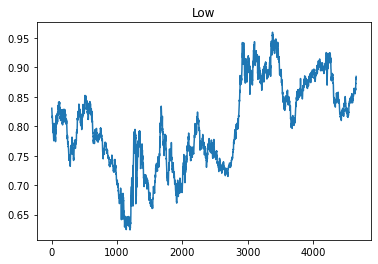

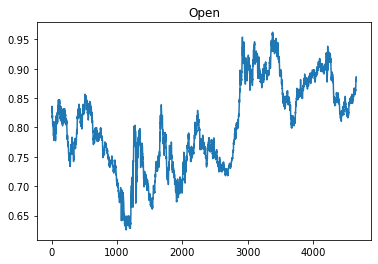

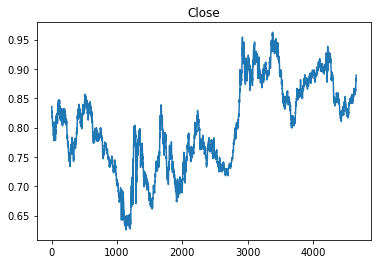

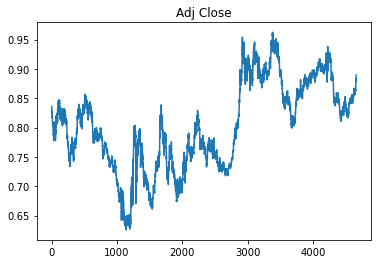

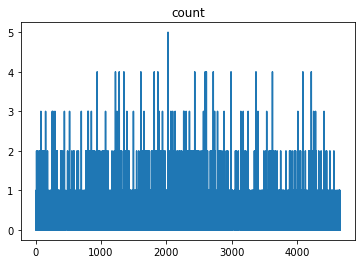

In [7]:
for i in df.columns[1:]:
    df[i].plot()
    plt.title(i)
    plt.show()

In [8]:
df.drop(df[df.High > 1].index, inplace=True)

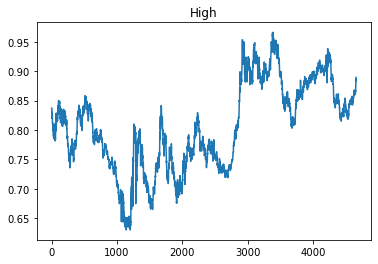

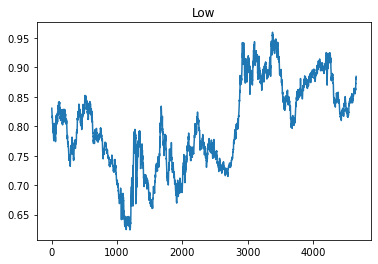

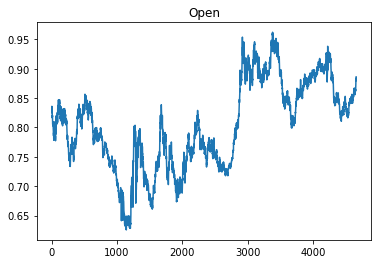

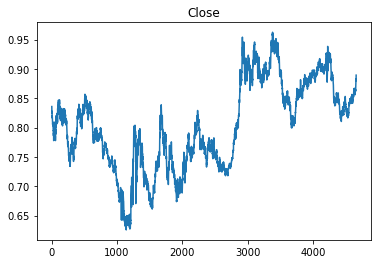

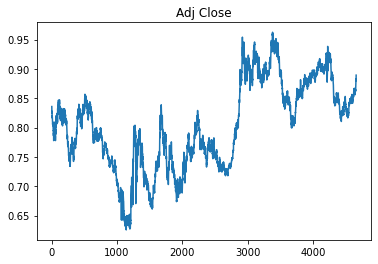

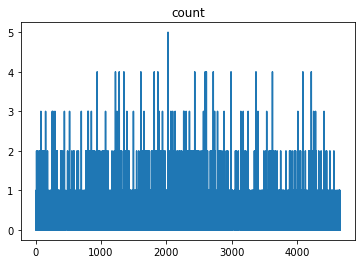

In [9]:
for i in df.columns[1:]:
    df[i].plot()
    plt.title(i)
    plt.show()

In [10]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

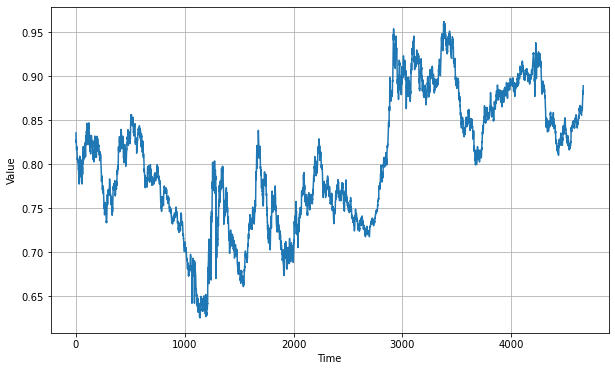

In [11]:
series = np.array(df.Close)
time = np.array(df.index)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [12]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [87]:
df

,Date,High,Low,Open,Close,Adj Close,count
0,2003-12-01,0.83724,0.830560,0.83098,0.83577,0.83577,0.0
1,2003-12-02,0.83710,0.825830,0.83605,0.82720,0.82720,0.0
2,2003-12-03,0.82802,0.824400,0.82713,0.82488,0.82488,0.0
3,2003-12-04,0.83029,0.823450,0.82508,0.82775,0.82775,1.0
4,2003-12-05,0.82878,0.820280,0.82795,0.82055,0.82055,1.0
...,...,...,...,...,...,...,...
4657,2021-11-16,0.88256,0.878194,0.87971,0.87978,0.87978,0.0
4658,2021-11-17,0.88727,0.882301,0.88369,0.88330,0.88330,1.0
4659,2021-11-18,0.88378,0.880300,0.88354,0.88330,0.88330,0.0
4660,2021-11-19,0.88870,0.879500,0.87950,0.87963,0.87963,0.0


In [85]:
from tensorflow import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [88]:
X_train = df[["Close"]].iloc[:-20]
X_test = df[["Close"]].iloc[-20:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

In [92]:
n_input = 100
n_features = 1
generator = TimeseriesGenerator(scaled_train, X_train.Close.values, length=n_input, batch_size=1)

In [93]:
X,y = generator[0]
print(f'Given the Array: \n{X.shape}')
print(f'Predict this y: \n {y.shape}')

Given the Array: 
(1, 100, 1)
Predict this y: 
 (1,)


In [97]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
  
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 10)
])


optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit_generator(generator,epochs=20)#

# EXPECTED OUTPUT SHOULD SEE AN MAE OF <2 WITHIN ABOUT 30 EPOCHS

C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
4540/4540 [==============================] - 185s 40ms/step - loss: 0.0278 - mae: 0.1636
Epoch 2/20
4540/4540 [==============================] - 182s 40ms/step - loss: 0.0032 - mae: 0.0544
Epoch 3/20
4540/4540 [==============================] - 182s 40ms/step - loss: 0.0024 - mae: 0.0469
Epoch 4/20
4540/4540 [==============================] - 183s 40ms/step - loss: 0.0020 - mae: 0.0431
Epoch 5/20
4540/4540 [==============================] - 183s 40ms/step - loss: 0.0017 - mae: 0.0407
Epoch 6/20
4540/4540 [==============================] - 182s 40ms/step - loss: 0.0016 - mae: 0.0389
Epoch 7/20
4540/4540 [==============================] - 182s 40ms/step - loss: 0.0014 - mae: 0.0375
Epoch 8/20
4540/4540 [==============================] - 181s 40ms/step - loss: 0.0013 - mae: 0.0363
Epoch 9/20
4540/4540 [==============================] - 316s 70ms/step - loss: 0.0013 - mae: 0.0354
Epoch 10/20
4540/4540 [==============================] - 367s 81ms/step - loss: 0.0012 - mae: 0.0345

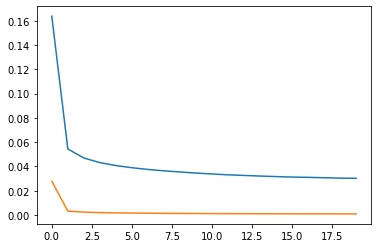

In [98]:
plt.plot(history.history["mae"])
plt.plot(history.history["loss"])


In [99]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]


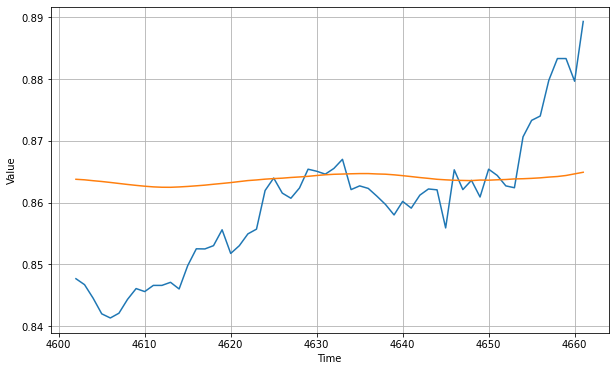

In [100]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [58]:
from tensorflow import keras

In [59]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))


learning_rate = 0.001
batch_size = 256


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [60]:
features = normalize(df.Close.values, train_split)
features = pd.DataFrame(features)
features.head()

,0
0,0.894668
1,0.767581
2,0.733177
3,0.775737
4,0.668967


In [61]:
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

In [64]:
past = 200
future = 20
step = 5

In [67]:
start = past + future
end = start + train_split

x_train = train_data.values
y_train = features.iloc[start:end][[0]]

sequence_length = int(past / step)

In [68]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [70]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end].values
y_val = features.iloc[label_start:][[0]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [71]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 40, 1)
Target shape: (256, 1)


In [75]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 40, 1)]           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [76]:
epochs = 100
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/100
13/13 [==============================] - 3s 64ms/step - loss: 0.8520 - val_loss: 1.2040

Epoch 00001: val_loss improved from inf to 1.20395, saving model to model_checkpoint.h5
Epoch 2/100
13/13 [==============================] - 0s 37ms/step - loss: 0.5471 - val_loss: 0.6090

Epoch 00002: val_loss improved from 1.20395 to 0.60899, saving model to model_checkpoint.h5
Epoch 3/100
13/13 [==============================] - 0s 37ms/step - loss: 0.3440 - val_loss: 0.2144

Epoch 00003: val_loss improved from 0.60899 to 0.21435, saving model to model_checkpoint.h5
Epoch 4/100
13/13 [==============================] - 0s 37ms/step - loss: 0.2422 - val_loss: 0.1318

Epoch 00004: val_loss improved from 0.21435 to 0.13184, saving model to model_checkpoint.h5
Epoch 5/100
13/13 [==============================] - 0s 37ms/step - loss: 0.2301 - val_loss: 0.1486

Epoch 00005: val_loss did not improve from 0.13184
Epoch 6/100
13/13 [==============================] - 0s 37ms/step - loss: 0.2174

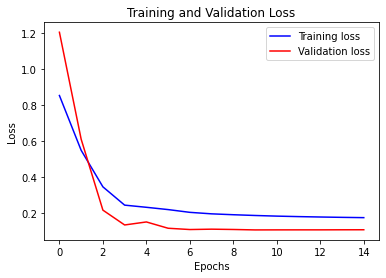

In [77]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [80]:
dataset_val.take(5)

<TakeDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>

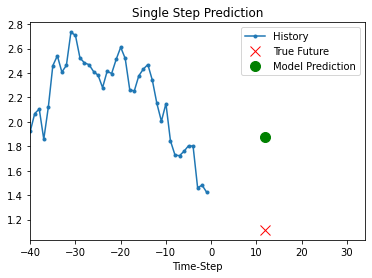

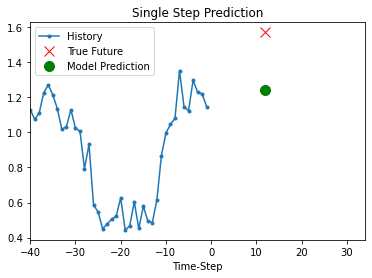

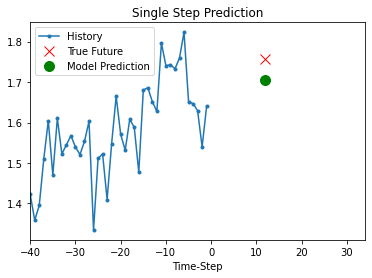

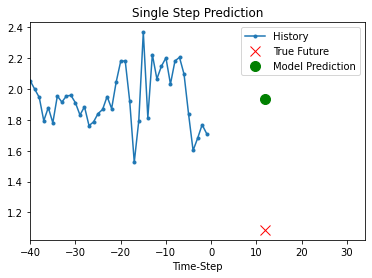

In [82]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 0].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )